Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

df = pd.read_csv('/content/data_date.csv')

In [ ]:
df.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19080 entries, 0 to 19079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       19080 non-null  object
 1   Country    19080 non-null  object
 2   Status     19080 non-null  object
 3   AQI Value  19080 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 596.4+ KB


In [ ]:
df.describe()

,AQI Value
count,19080.000000
mean,63.635063
std,50.179201
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


In [ ]:
df.isna().sum()

,0
Date,0
Country,0
Status,0
AQI Value,0


In [ ]:
df.columns

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')

In [ ]:
df.drop_duplicates()

,Country,Status,AQI Value
0,Albania,Good,14
1,Algeria,Moderate,65
2,Andorra,Moderate,55
3,Angola,Unhealthy for Sensitive Groups,113
4,Argentina,Moderate,63
...,...,...,...
19049,Palestinian Territory,Moderate,89
19057,San Marino,Good,30
19071,Trinidad and Tobago,Good,3
19073,Ukraine,Good,31


In [ ]:
df.size

57240

In [ ]:
df.shape

(19080, 3)

In [ ]:
x=df[['AQI Value']]

In [ ]:
x

,AQI Value
0,14
1,65
2,55
3,113
4,63
...,...
19075,84
19076,66
19077,23
19078,24


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Status'])

In [ ]:
y

array([0, 2, 2, ..., 0, 0, 2])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
y_train

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
print(df.columns)

Index(['Country', 'Status', 'AQI Value'], dtype='object')


In [ ]:
print(x_train.shape)

(15264, 2)


In [ ]:
x_train.columns

Index(['Country', 'AQI Value'], dtype='object')

In [ ]:
y_train.shape

(3816, 2)

In [ ]:
x_train.dtypes

dtype('int64')

In [ ]:
x_train.dtypes

dtype('int64')

In [ ]:
df['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

In [ ]:
df.drop('Country',axis=True,inplace=True)

In [ ]:
x_train.dtype

dtype('int64')

In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,pred)
accuracy*100

100.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)


In [ ]:
acc=accuracy_score(y_test,y_pred)
acc*100

100.0

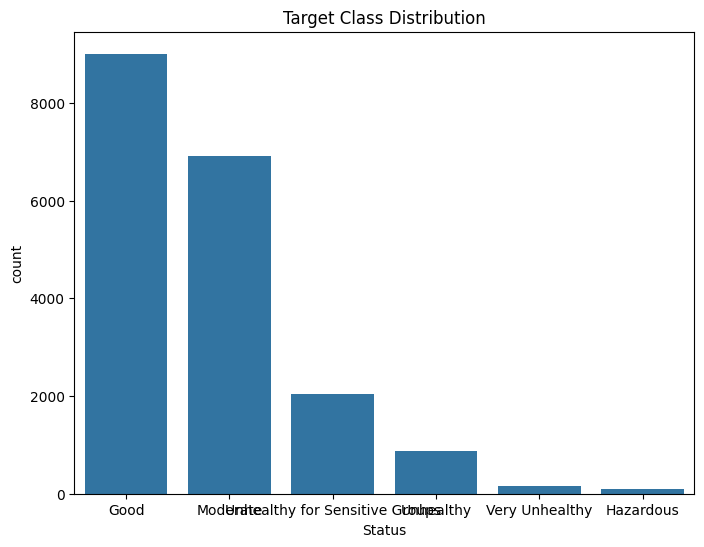

Status
Good                              9006
Moderate                          6915
Unhealthy for Sensitive Groups    2041
Unhealthy                          865
Very Unhealthy                     164
Hazardous                           89
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df)
plt.title("Target Class Distribution")
plt.show()
print(df['Status'].value_counts())
